# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## Importing necessary libraries

In [ ]:
# To help with reading and manipulation of data
import numpy as np
import pandas as pd

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To split the data
from sklearn.model_selection import train_test_split

# to build models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier

# to create k folds of data and get cross validation score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



# To impute missing values
from sklearn.impute import SimpleImputer

# To build a Random forest classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# To tune a model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI and Machine Learning/Project 3/BankChurners.csv')
data = df.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
data.shape

(10127, 21)

In [ ]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [ ]:
data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
#Removing clientnum as this is just a unique id which does not add value for modelling
data.drop('CLIENTNUM',axis=1,inplace=True)

In [ ]:
#Converting dependent variable's values to 0 and 1 for our analysis
data['Attrition_Flag'].replace({'Existing Customer':0,'Attrited Customer':1},inplace=True)

## Exploratory Data Analysis (EDA)

**Lets try and find answers to some of the questions like below**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

Univariate Analysis

In [ ]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


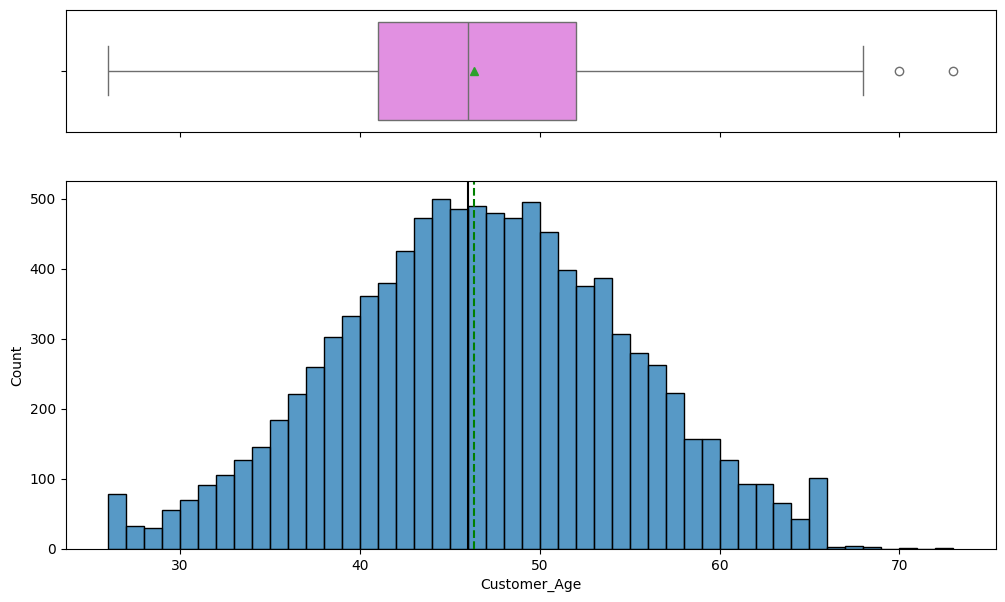

In [ ]:
#Customer age analysis
histogram_boxplot(data,'Customer_Age')

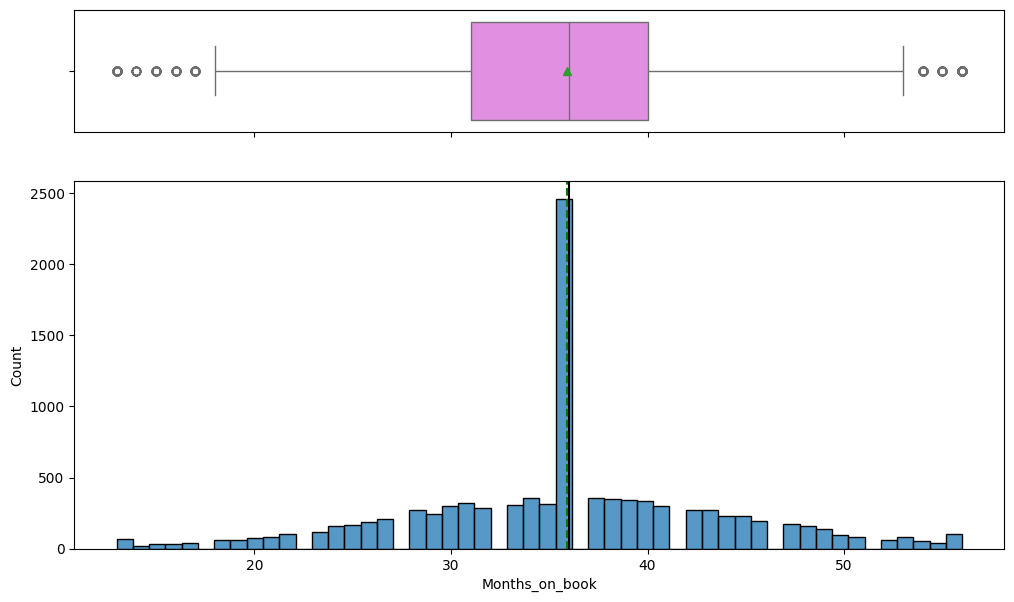

In [ ]:
#Months on book analysis
histogram_boxplot(data,'Months_on_book')

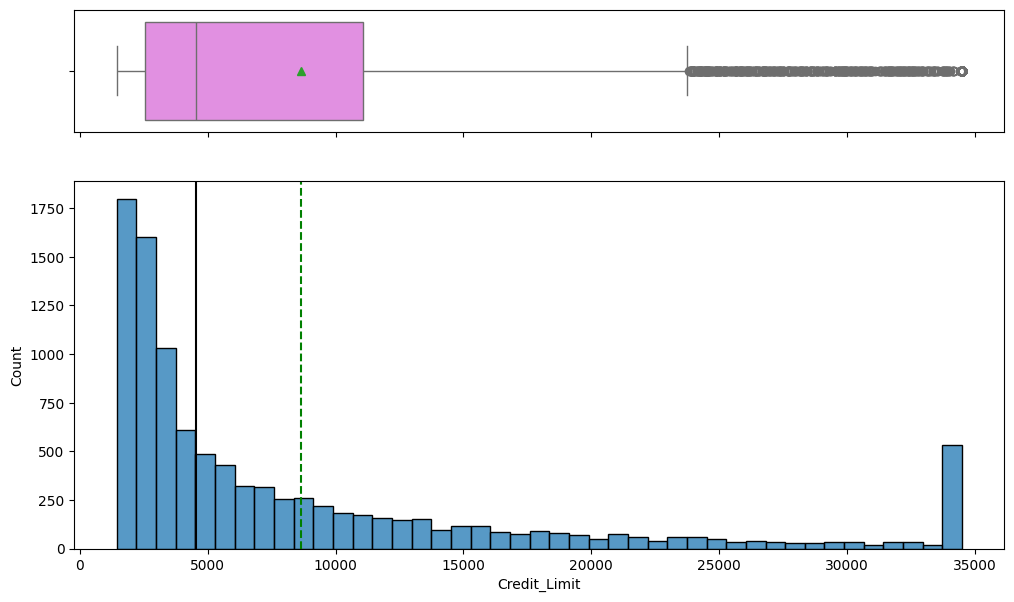

In [ ]:
#Credit limit analysis
histogram_boxplot(data,'Credit_Limit')

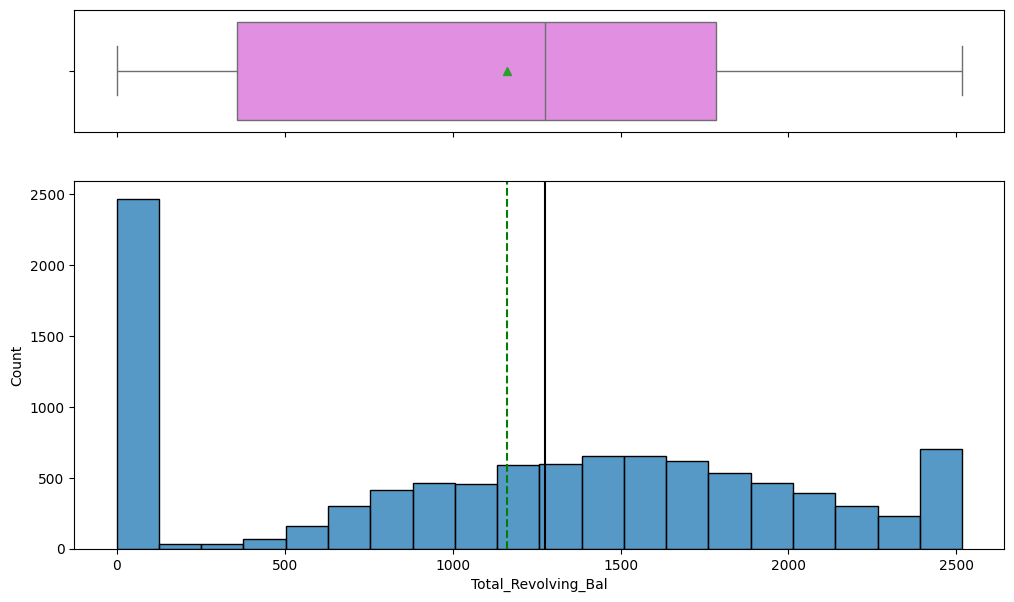

In [ ]:
#Total Revolving Bal analysis
histogram_boxplot(data,'Total_Revolving_Bal')

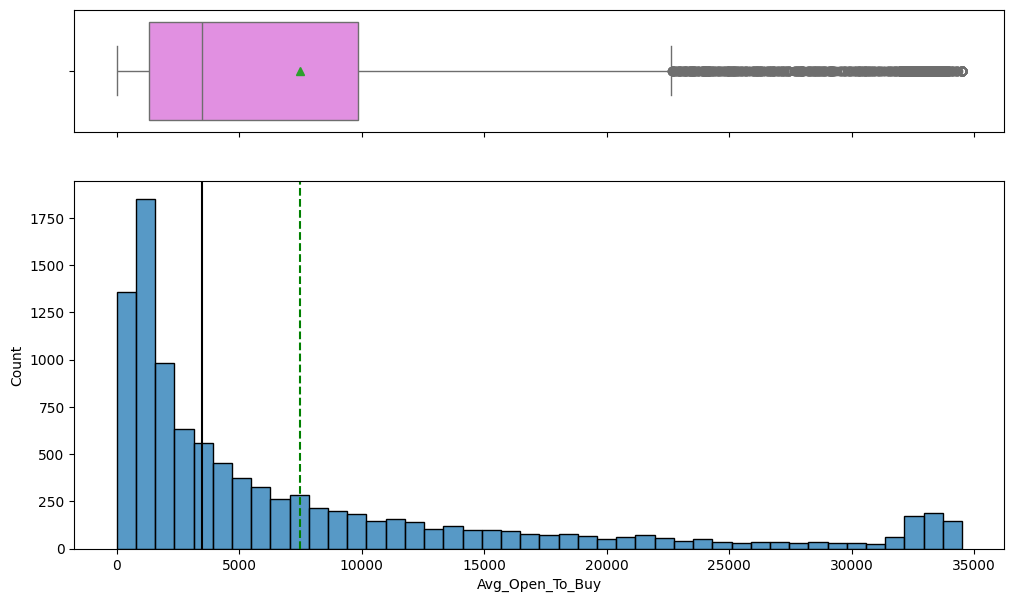

In [ ]:
#Avg_Open_To_Buy analysis
histogram_boxplot(data,'Avg_Open_To_Buy')

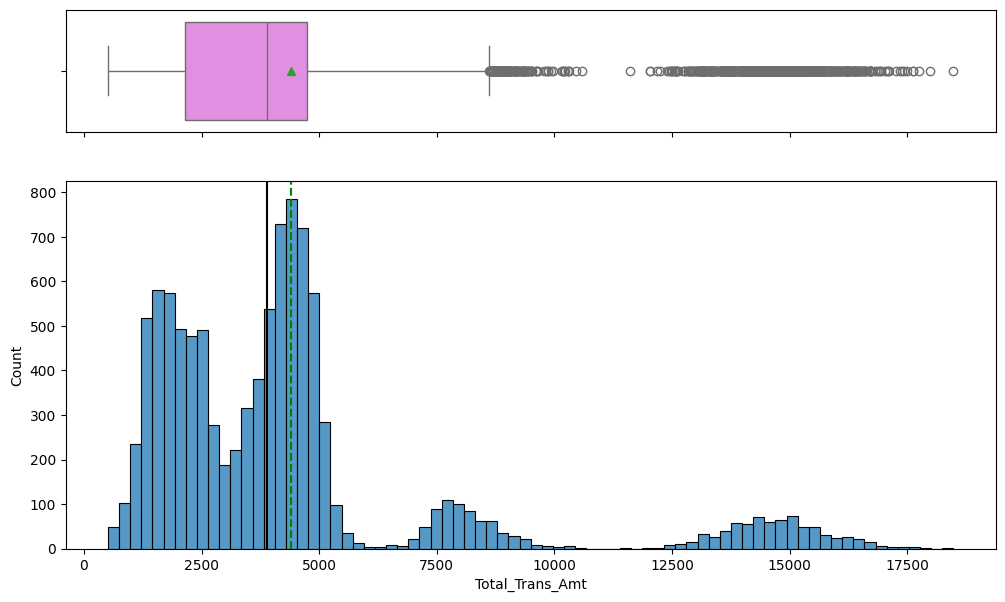

In [ ]:
#Total_Trans_Amt analysis
histogram_boxplot(data,'Total_Trans_Amt')

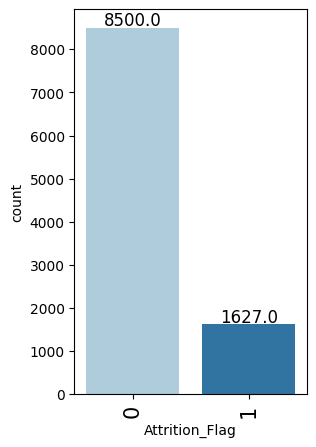

In [ ]:
#Attrition_Flag Analysis
labeled_barplot(data, "Attrition_Flag")

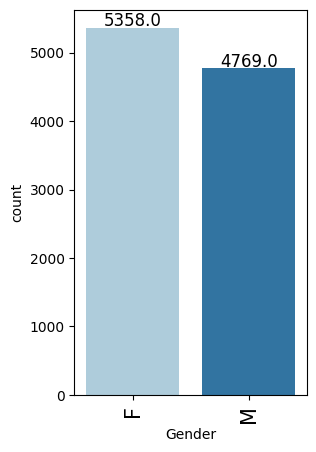

In [ ]:
#Gender Analysis
labeled_barplot(data, "Gender")

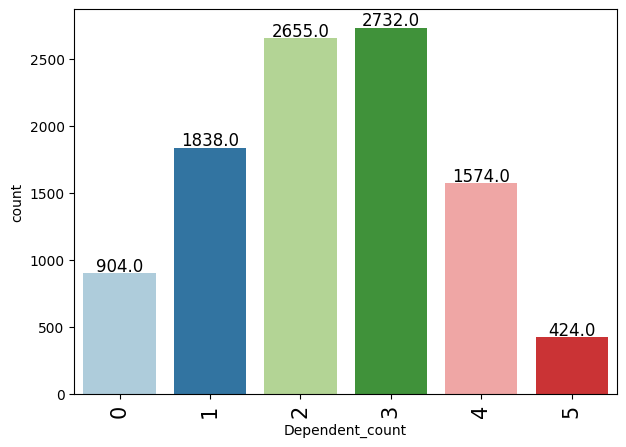

In [ ]:
#Dependent_count Analysis
labeled_barplot(data, "Dependent_count")

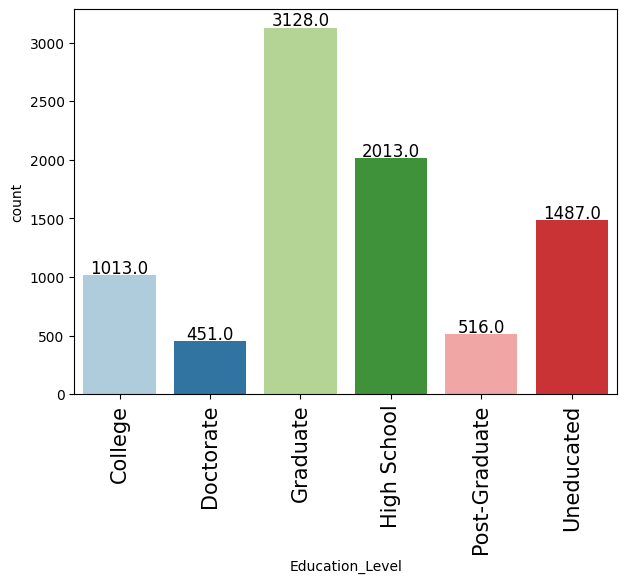

In [ ]:
#Education_Level Analysis
labeled_barplot(data, "Education_Level")

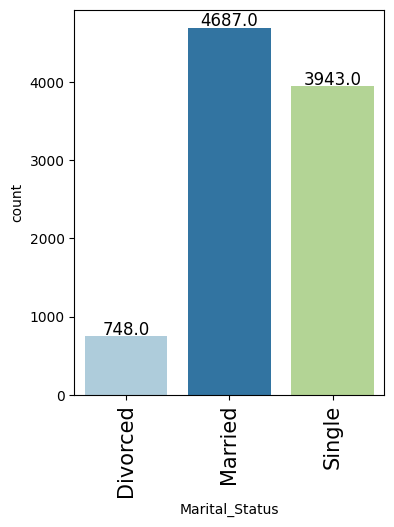

In [ ]:
#Marital_Status Analysis
labeled_barplot(data, "Marital_Status")

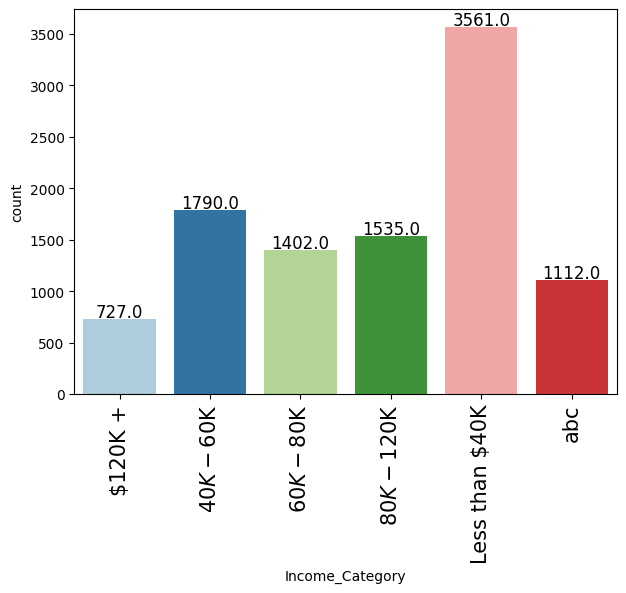

In [ ]:
#Income_Category Analysis
labeled_barplot(data, "Income_Category")

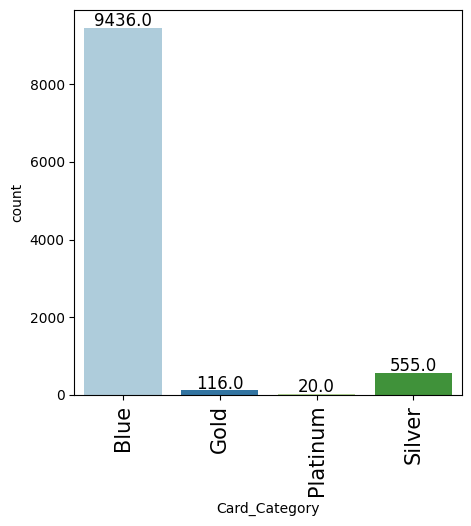

In [ ]:
#Card_Category Analysis
labeled_barplot(data, "Card_Category")

**Bi-variate Analysis**

<Axes: >

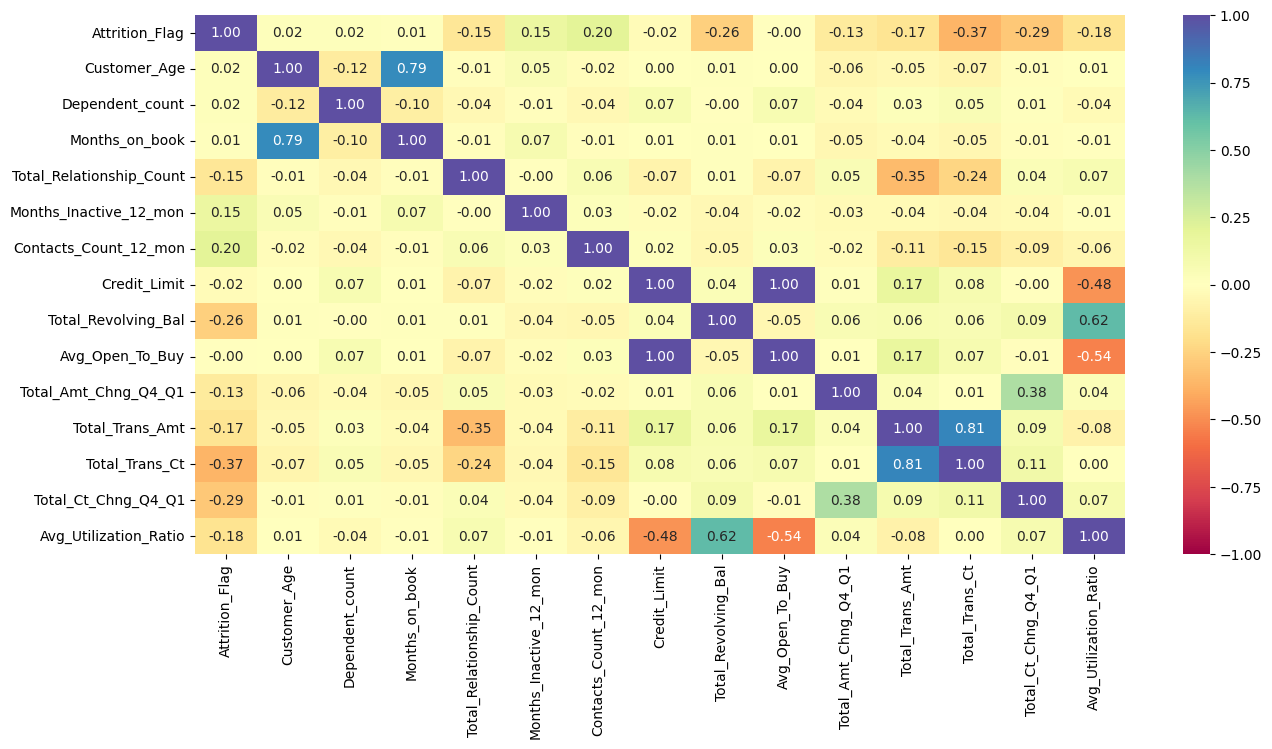

In [ ]:
#Correlation Analysis
correlation = data.corr()
plt.figure(figsize=(15,7))
sns.heatmap(correlation,cmap='Spectral',vmin=-1,vmax=1,annot=True,fmt='.2f')

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


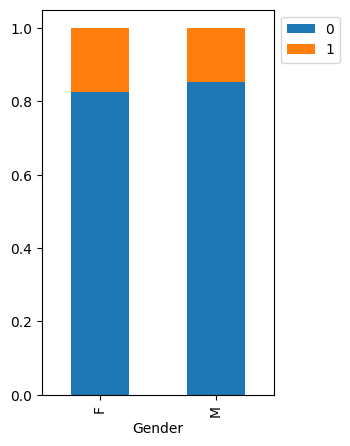

In [ ]:
#Attrition flag vs Gender
stacked_barplot(data,'Gender','Attrition_Flag')

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


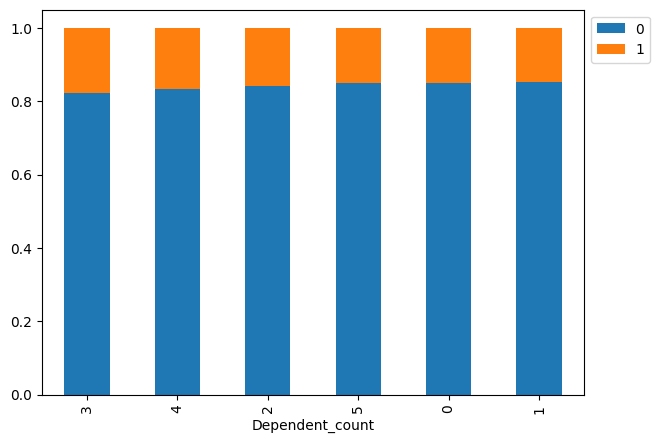

In [ ]:
#Attrition flag vs Dependent_count
stacked_barplot(data,'Dependent_count','Attrition_Flag')

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


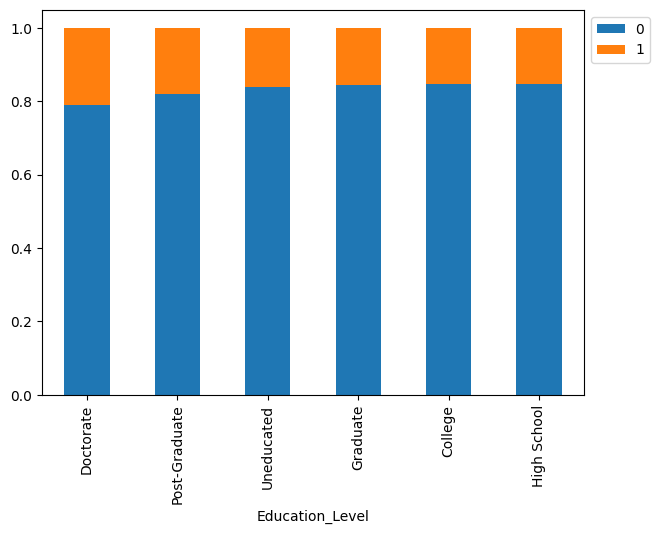

In [ ]:
#Attrition flag vs Education_Level
stacked_barplot(data,'Education_Level','Attrition_Flag')

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


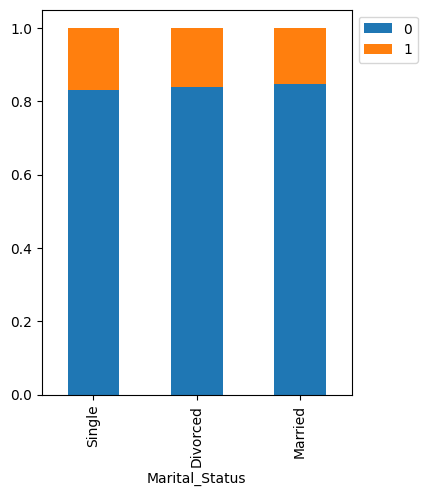

In [ ]:
#Attrition flag vs Marital_Status
stacked_barplot(data,'Marital_Status','Attrition_Flag')

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


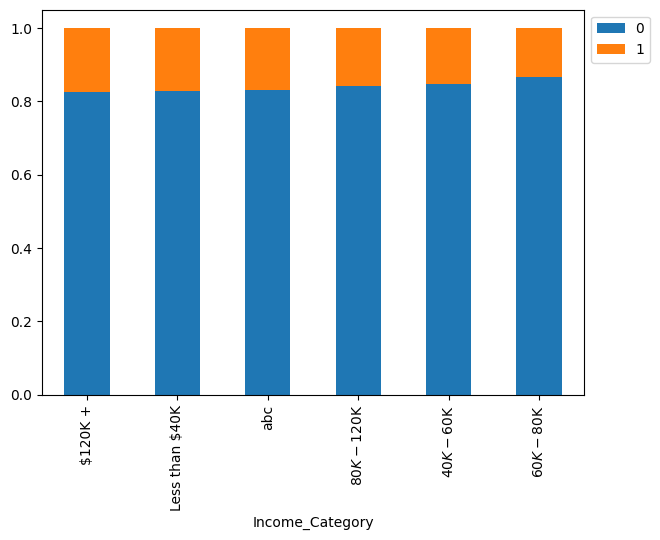

In [ ]:
#Attrition flag vs Income_Category
stacked_barplot(data,'Income_Category','Attrition_Flag')

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


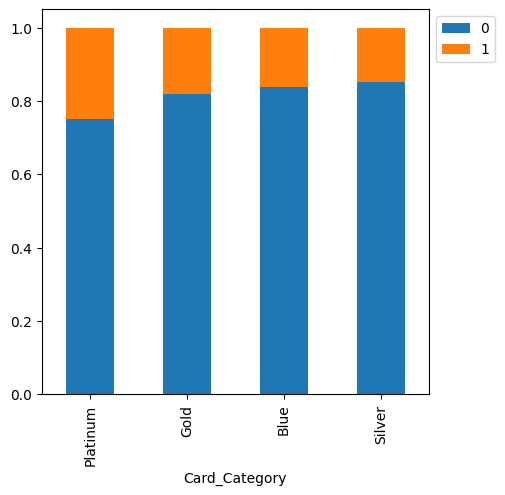

In [ ]:
#Attrition flag vs Card_Category
stacked_barplot(data,'Card_Category','Attrition_Flag')

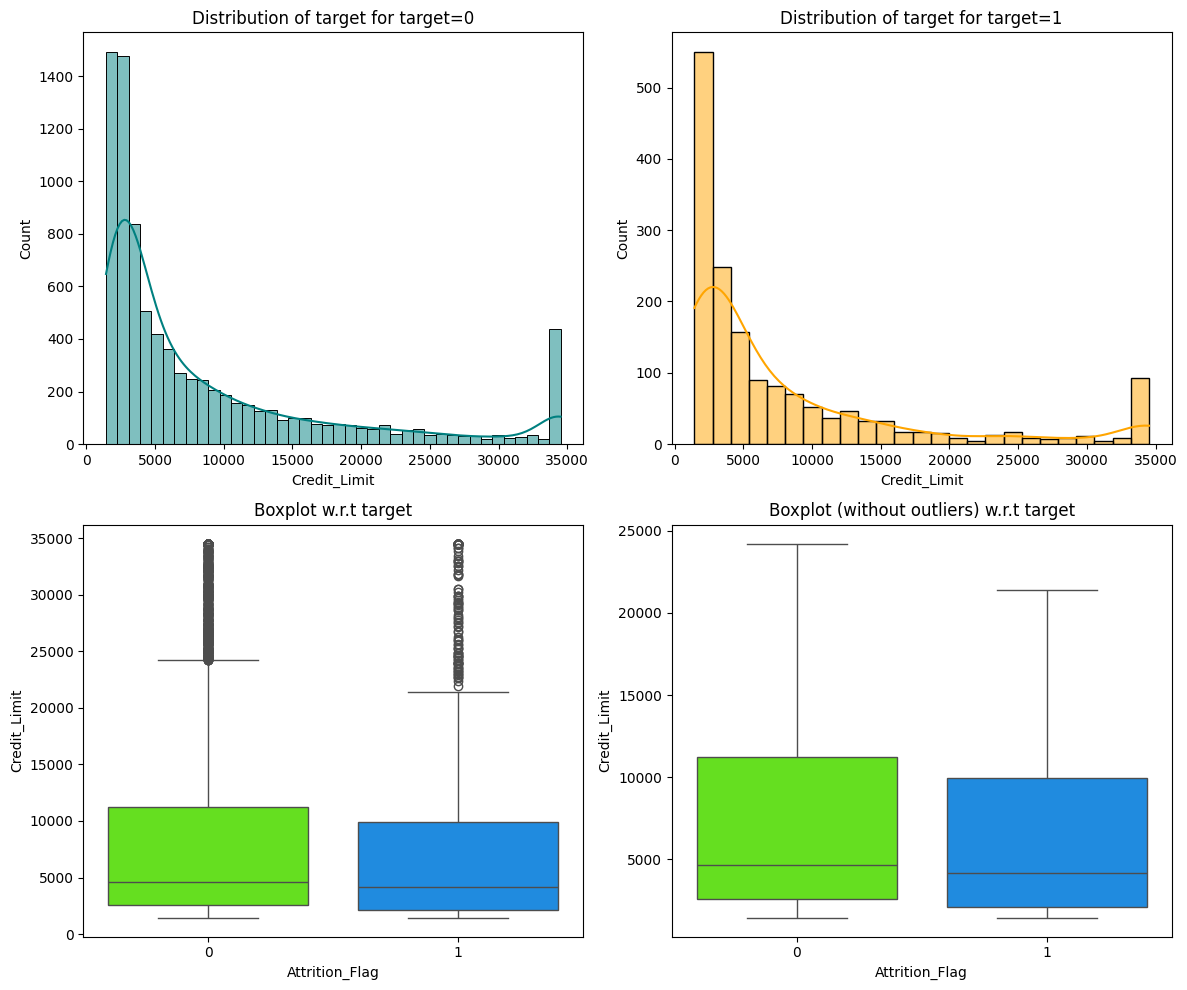

In [ ]:
#Attrition flag vs Credit_Limit
distribution_plot_wrt_target(data,'Credit_Limit','Attrition_Flag')

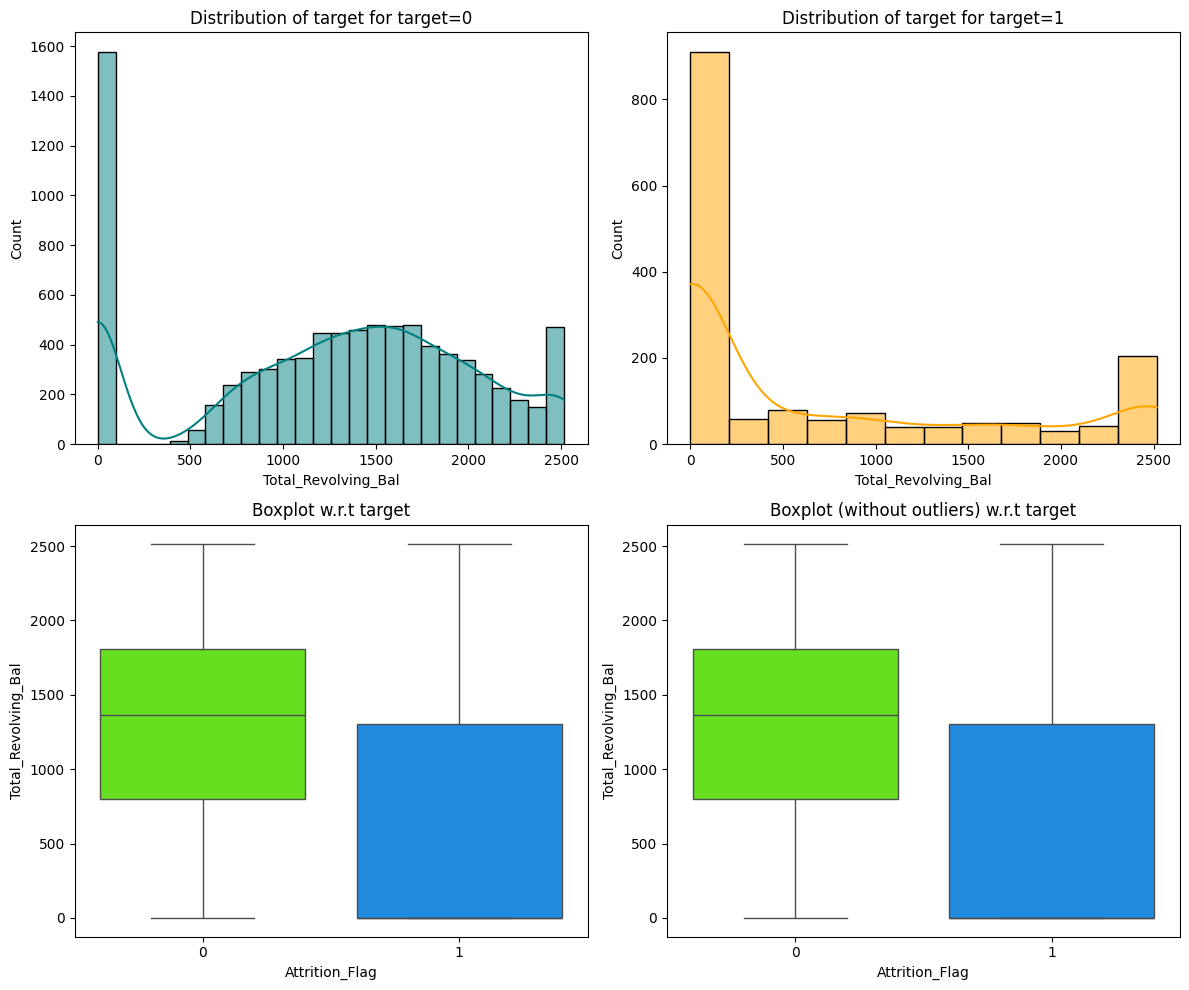

In [ ]:
#Attrition flag vs Total_Revolving_Bal
distribution_plot_wrt_target(data,'Total_Revolving_Bal','Attrition_Flag')

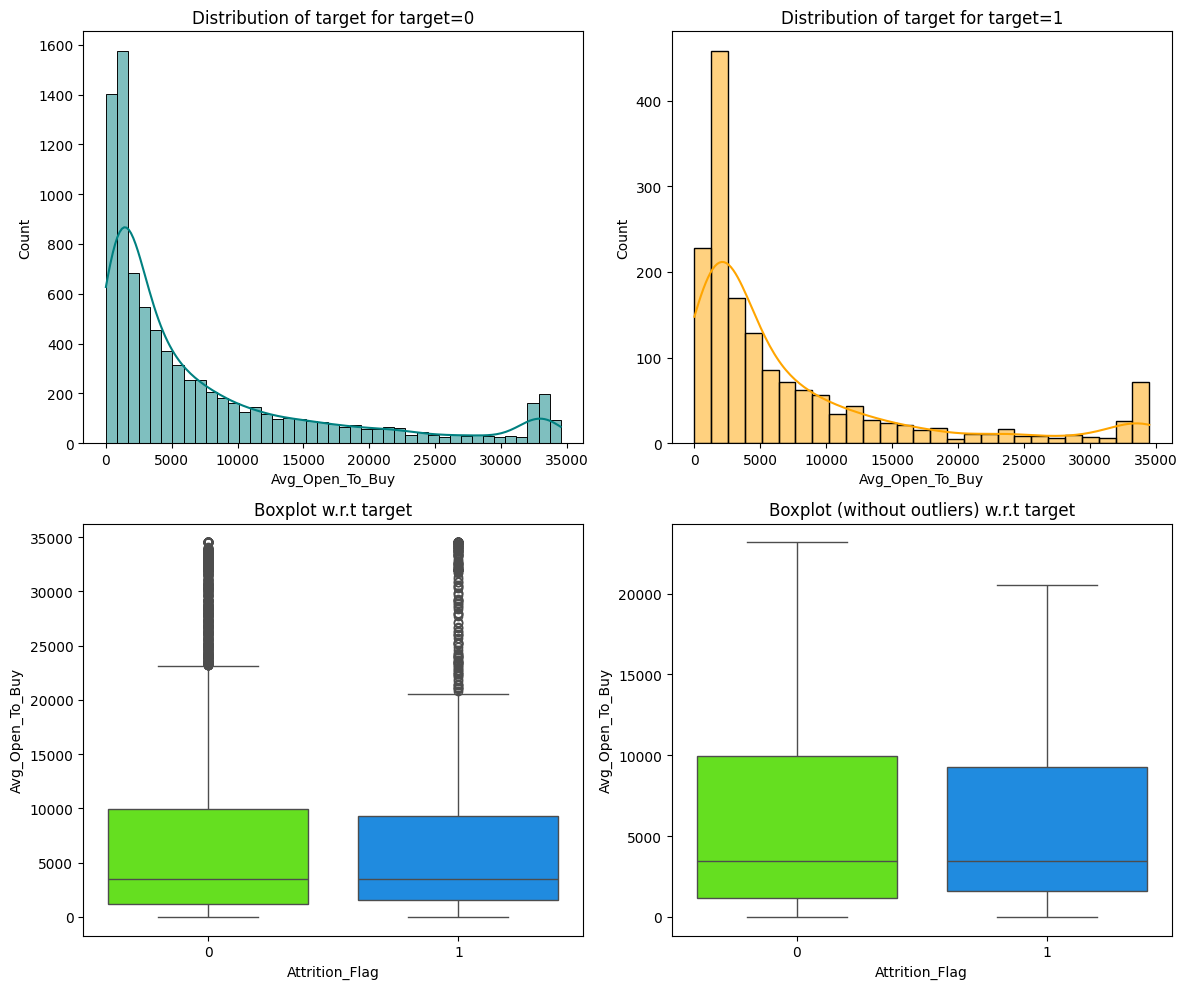

In [ ]:
#Attrition flag vs Avg_Open_To_Buy
distribution_plot_wrt_target(data,'Avg_Open_To_Buy','Attrition_Flag')

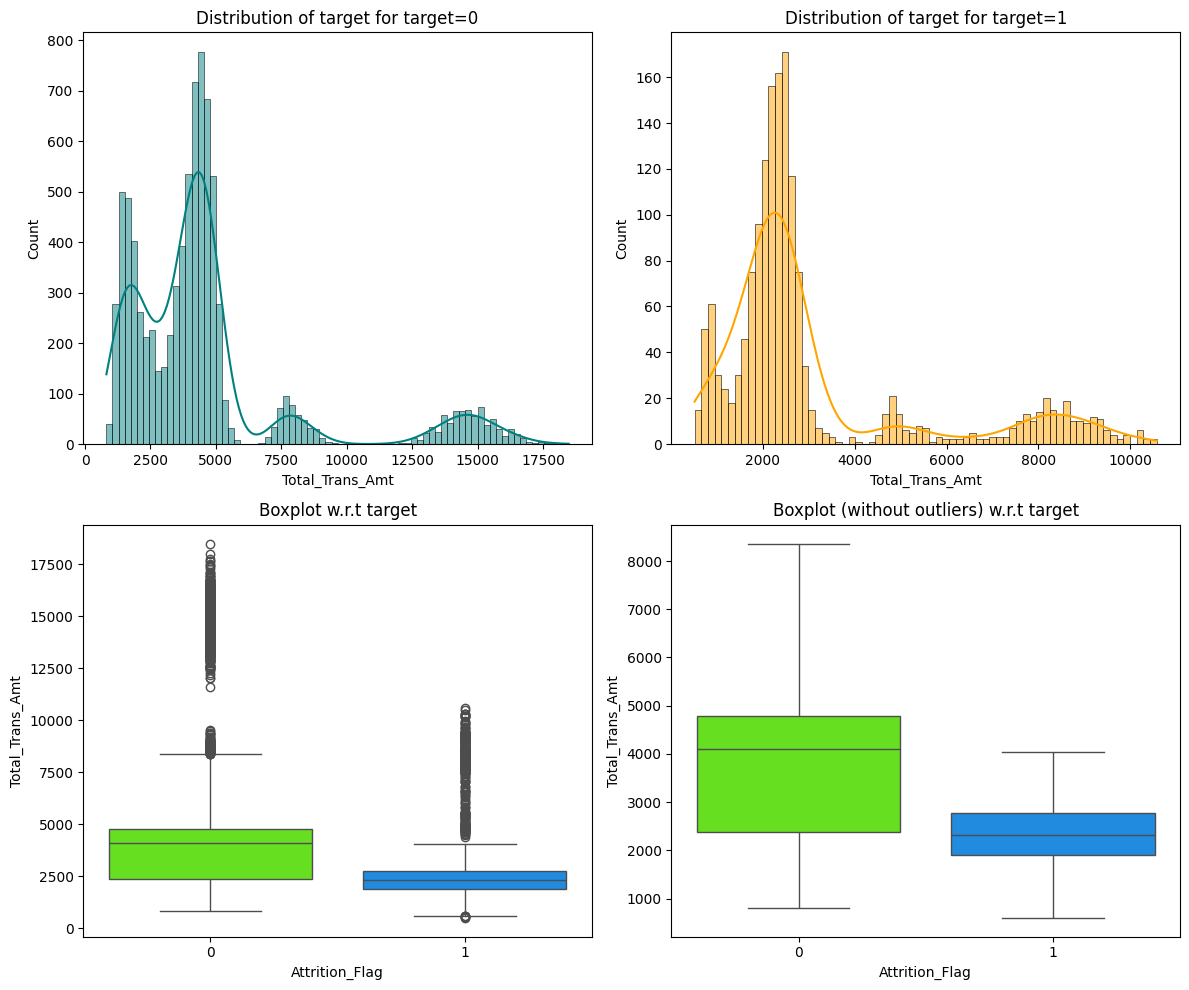

In [ ]:
#Attrition flag vs Total_Trans_Amt
distribution_plot_wrt_target(data,'Total_Trans_Amt','Attrition_Flag')

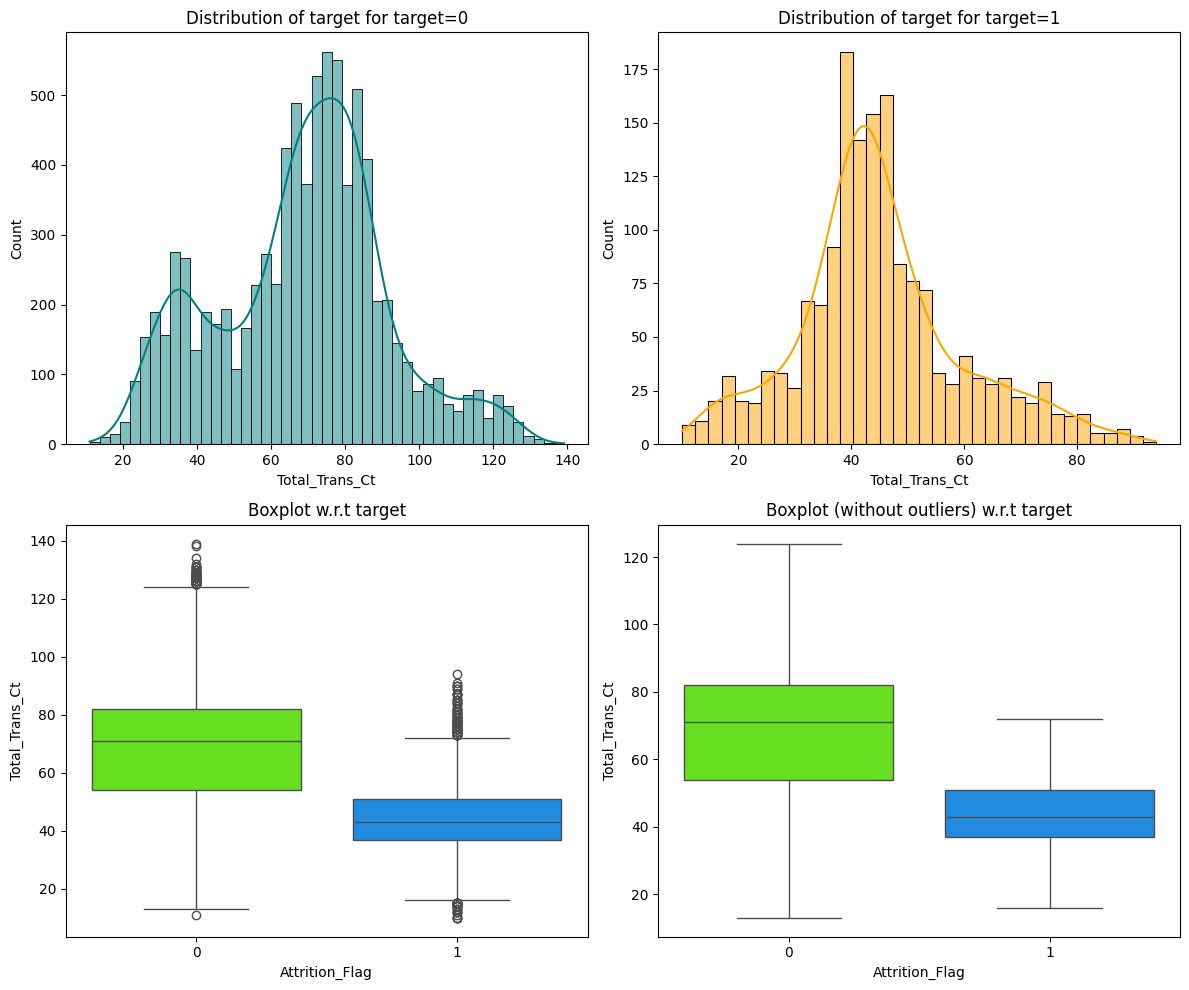

In [ ]:
#Attrition flag vs Total_Trans_Ct
distribution_plot_wrt_target(data,'Total_Trans_Ct','Attrition_Flag')

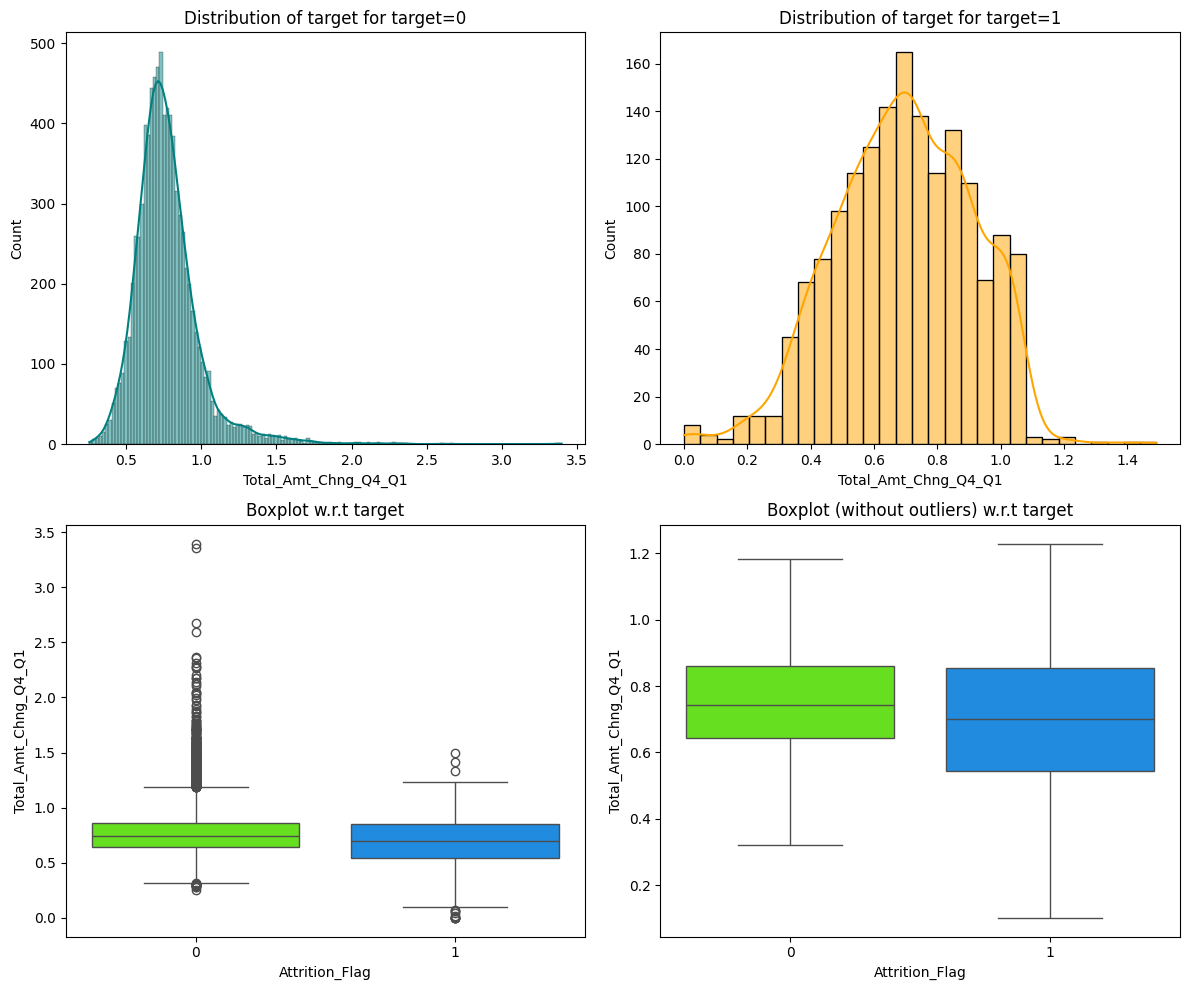

In [ ]:
#Attrition flag vs Total_Amt_Chng_Q4_Q1
distribution_plot_wrt_target(data,'Total_Amt_Chng_Q4_Q1','Attrition_Flag')

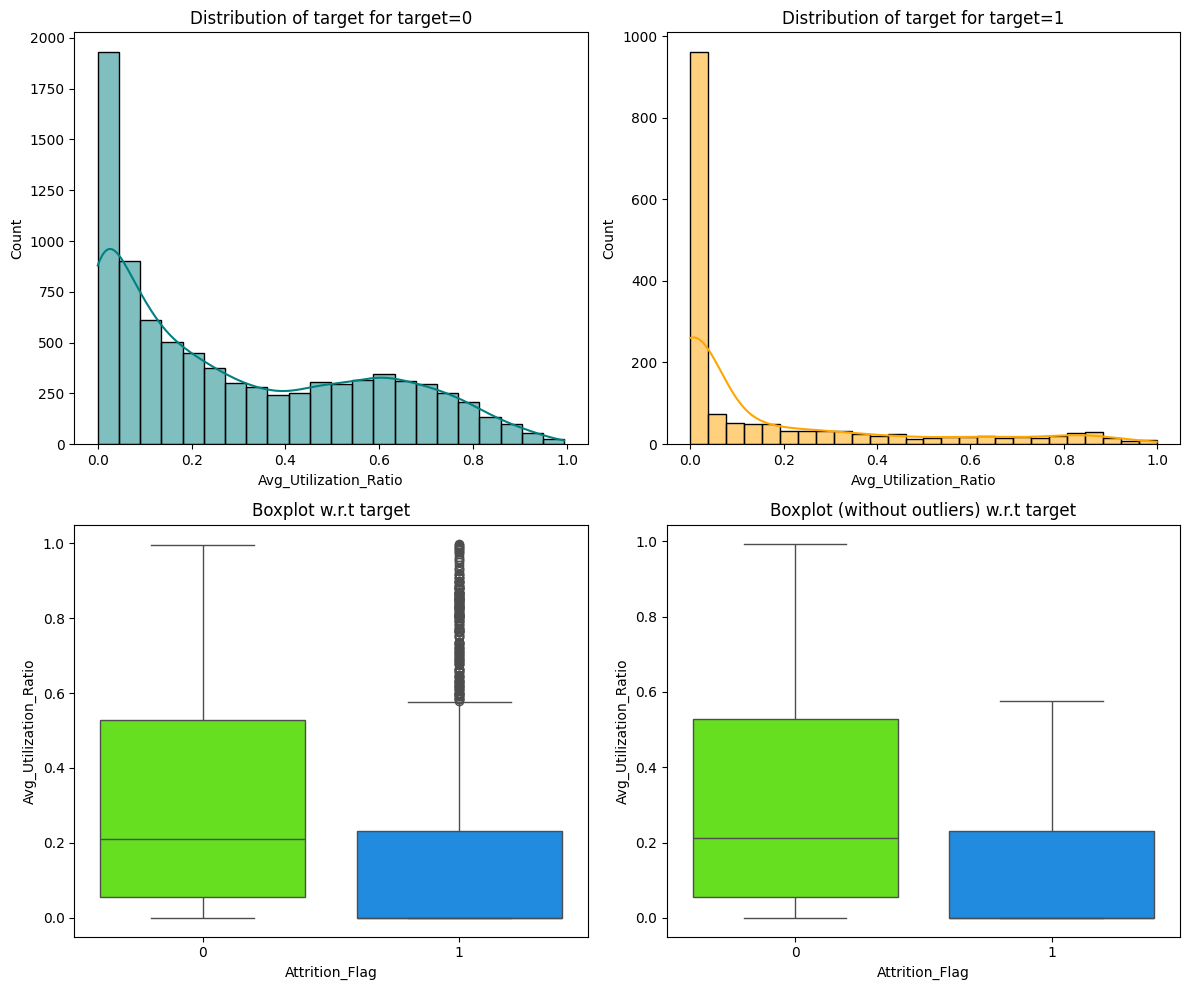

In [ ]:
#Attrition flag vs Avg_Utilization_Ratio
distribution_plot_wrt_target(data,'Avg_Utilization_Ratio','Attrition_Flag')

**EDA observations**

Based on the correlations and observations provided, here are some insights you can include in your EDA project:

**Customer Age and Months on Book**: The high correlation (0.79) between customer age and months on book suggests that older customers tend to have longer relationships with the bank. This could indicate that customer loyalty increases with age.

**Avg Utilization Ratio and Total Revolving Balance**: The moderate correlation (0.62) between average utilization ratio and total revolving balance indicates that customers who use a higher proportion of their available credit tend to have higher revolving balances on their credit cards.

**Total Transaction Amount and Total Transaction Count**: The high correlation (0.81) between total transaction amount and total transaction count suggests that customers who make more transactions also tend to spend more. This could indicate higher engagement or activity levels among certain customer segments.

**Avg Utilization Ratio and Avg Open To Buy**: The negative correlation (-0.54) between average utilization ratio and average open to buy suggests an inverse relationship between credit utilization and available credit. Customers with higher utilization ratios tend to have less available credit.

**Gender and Attrition Rate**: Female customers have a higher attrition rate compared to male customers. This could be due to various factors such as differences in financial needs, preferences, or satisfaction levels with the bank's services.

**Education Level and Attrition Rate**: Customers with a doctorate education have a higher attrition rate. This could be attributed to factors such as higher income levels or different financial goals and priorities among individuals with advanced degrees.

**Card Category and Attrition Rate**: Customers with platinum card category have a higher attrition rate. This may be because platinum cardholders have higher expectations for service quality, rewards, or benefits, and may be more likely to switch to another provider if their needs are not met.

## Data Pre-processing

**Outliers:**
It is important to check if the outliers are genuine or a data entry errors and treat them accordingly. If the outliers are genuine then we should have them for our analysis.

In [ ]:
# Check for outliers in the data
Q1 = data.quantile(0.25)  # To find the 25th percentile
Q3 = data.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

#Percentage of outliers
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

Attrition_Flag              16.065962
Customer_Age                 0.019749
Dependent_count              0.000000
Months_on_book               3.811593
Total_Relationship_Count     0.000000
Months_Inactive_12_mon       3.268490
Contacts_Count_12_mon        6.211119
Credit_Limit                 9.716599
Total_Revolving_Bal          0.000000
Avg_Open_To_Buy              9.509233
Total_Amt_Chng_Q4_Q1         3.910339
Total_Trans_Amt              8.847635
Total_Trans_Ct               0.019749
Total_Ct_Chng_Q4_Q1          3.890590
Avg_Utilization_Ratio        0.000000
dtype: float64

Data anamolies

In [ ]:
# Checking for data anamolies in the income category
data['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

In [ ]:
#Replacing anamolies with Nan
data["Income_Category"].replace("abc", np.nan, inplace=True)

In [ ]:
data.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

### Train Test Split:

**Performing train test split before missing value imputation or any other transformations to make sure there will be no data leakage in to the test data set.**




In [ ]:
# X and y data split
X = data.drop('Attrition_Flag',axis=1)
y = data['Attrition_Flag']

Splitting data in to 3 different sets as **train**, **validation** and **test** sets. We will use test set only to test model performance at the end after all the tunings to avoid **data leakage** and **overfitting**





> Train set: For Modelling

> Validation set: To validate during tuning

> Test set: To test final performance








In [ ]:
# Train, Validation and Test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=1, stratify = y)

# Splitting temp in to validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify = y)

In [ ]:
#Check shapes
print(X_train.shape, X_val.shape, X_test.shape)

(8101, 19) (1519, 19) (507, 19)


## Missing value imputation




In [ ]:
data.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [ ]:
#Choose strategy for imputing missing values
imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
#Attributes for imputation
impute_attributes = ['Education_Level','Marital_Status','Income_Category']

In [ ]:
# Fit and transform the train data
X_train[impute_attributes] = imputer.fit_transform(X_train[impute_attributes])

# Fit and transform the val data
X_val[impute_attributes] = imputer.fit_transform(X_val[impute_attributes])

# Fit and transform the test data
X_test[impute_attributes] = imputer.fit_transform(X_test[impute_attributes])

In [ ]:
# Checking for missing values after imputation
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

In [ ]:
#Check categorical values to perform one-hot encoding
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8101 entries, 6641 to 235
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              8101 non-null   int64  
 1   Gender                    8101 non-null   object 
 2   Dependent_count           8101 non-null   int64  
 3   Education_Level           8101 non-null   object 
 4   Marital_Status            8101 non-null   object 
 5   Income_Category           8101 non-null   object 
 6   Card_Category             8101 non-null   object 
 7   Months_on_book            8101 non-null   int64  
 8   Total_Relationship_Count  8101 non-null   int64  
 9   Months_Inactive_12_mon    8101 non-null   int64  
 10  Contacts_Count_12_mon     8101 non-null   int64  
 11  Credit_Limit              8101 non-null   float64
 12  Total_Revolving_Bal       8101 non-null   int64  
 13  Avg_Open_To_Buy           8101 non-null   float64
 14  Total_

In [ ]:
#Using get_dummies to perform one-hot encoding on categorical columns
X_train = pd.get_dummies(X_train,drop_first=True)
X_val = pd.get_dummies(X_val,drop_first=True)
X_test = pd.get_dummies(X_test,drop_first=True)

In [ ]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
6641,51,0,35,5,1,2,34516.0,2332,32184.0,0.800,...,0,1,0,0,0,0,0,0,0,1
1302,56,3,36,6,3,3,34516.0,1047,33469.0,0.610,...,1,1,0,0,0,0,0,0,0,0
5825,47,3,38,4,2,3,1438.3,0,1438.3,1.001,...,0,0,1,0,0,0,1,0,0,0
1495,32,1,22,3,1,4,16912.0,1590,15322.0,1.274,...,0,1,0,0,0,0,1,0,0,0
3342,50,3,39,5,3,4,13824.0,1582,12242.0,0.522,...,0,1,0,0,0,1,0,0,0,0


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Decision tree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", xgb.XGBClassifier(random_state=1,eval_metric='logloss')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Decision tree: 1.0
Bagging: 0.9845679012345679
Random forest: 1.0
Gradient boosting: 0.8904320987654321
XGBoost: 1.0

Validation Performance:

Decision tree: 0.816
Bagging: 0.824
Random forest: 0.82
Gradient boosting: 0.848
XGBoost: 0.908


### Model Building with Oversampled data


In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 1296
Before Oversampling, counts of label 'No': 6805 

After Oversampling, counts of label 'Yes': 6805
After Oversampling, counts of label 'No': 6805 

After Oversampling, the shape of train_X: (13610, 29)
After Oversampling, the shape of train_y: (13610,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Decision tree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", xgb.XGBClassifier(random_state=1,eval_metric='logloss')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Decision tree: 1.0
Bagging: 0.9977957384276267
Random forest: 1.0
Gradient boosting: 0.9822189566495224
XGBoost: 1.0

Validation Performance:

Decision tree: 0.848
Bagging: 0.84
Random forest: 0.876
Gradient boosting: 0.916
XGBoost: 0.892


### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data

print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1296
Before Under Sampling, counts of label 'No': 6805 

After Under Sampling, counts of label 'Yes': 1296
After Under Sampling, counts of label 'No': 1296 

After Under Sampling, the shape of train_X: (2592, 29)
After Under Sampling, the shape of train_y: (2592,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Decision tree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", xgb.XGBClassifier(random_state=1,eval_metric='logloss')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Decision tree: 1.0
Bagging: 0.9938271604938271
Random forest: 1.0
Gradient boosting: 0.9807098765432098
XGBoost: 1.0

Validation Performance:

Decision tree: 0.908
Bagging: 0.932
Random forest: 0.964
Gradient boosting: 0.976
XGBoost: 0.968


### HyperparameterTuning

#### **1) Decision tree tuning with original data**

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.7677903177903177:


In [ ]:
# Set the model to the best combination of parameters
dTree_tuned_original = DecisionTreeClassifier(
    min_samples_leaf=7,
    min_impurity_decrease=0.0001,
    max_leaf_nodes=15,
    max_depth=5,
    random_state=1,
)

# Fit the algorithm to the data.
dTree_tuned_original.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

In [ ]:
# Checking recall score on train and validation set
print("Recall on train and validation set")

dTree_org_train = recall_score(y_train, dTree_tuned_original.predict(X_train))
dTree_org_val = recall_score(y_val, dTree_tuned_original.predict(X_val))

print(dTree_org_train)
print(dTree_org_val)
print("")

dTree_org_train = pd.Series(dTree_org_train)
dTree_org_val = pd.Series(dTree_org_val)

Recall on train and validation set
0.7901234567901234
0.788



#### **2) Decision tree tuning with oversampled data**

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=0.9053637031594416:


In [ ]:
# Set the model to the best combination of parameters
dTree_tuned_over = DecisionTreeClassifier(
    min_samples_leaf=1,
    min_impurity_decrease=0.001,
    max_leaf_nodes=15,
    max_depth=4,
    random_state=1,
)

# Fit the algorithm to the data.
dTree_tuned_over.fit(X_train_over,y_train_over)



DecisionTreeClassifier(max_depth=4, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, random_state=1)

In [ ]:
# Checking recall score on train and validation set
print("Recall on train and validation set")

dTree_over_train = recall_score(y_train_over, dTree_tuned_over.predict(X_train_over))
dTree_over_val = recall_score(y_val, dTree_tuned_over.predict(X_val))

print(dTree_over_train)
print(dTree_over_val)
print("")

dTree_over_train = pd.Series(dTree_over_train)
dTree_over_val = pd.Series(dTree_over_val)

Recall on train and validation set
0.9080088170462894
0.864



#### **3) Decision tree tuning with undersampled data**

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.9004306504306504:


In [ ]:
# Set the model to the best combination of parameters
dTree_tuned_under = DecisionTreeClassifier(
    min_samples_leaf=7,
    min_impurity_decrease=0.0001,
    max_leaf_nodes=15,
    max_depth=5,
    random_state=1,
)

# Fit the algorithm to the data.
dTree_tuned_under.fit(X_train_un,y_train_un)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

In [ ]:
# Checking recall score on train and validation set
print("Recall on train and validation set")

dTree_under_train = recall_score(y_train_un, dTree_tuned_under.predict(X_train_un))
dTree_under_val = recall_score(y_val, dTree_tuned_under.predict(X_val))

print(dTree_under_train)
print(dTree_under_val)
print("")

dTree_under_train = pd.Series(dTree_under_train)
dTree_under_val = pd.Series(dTree_under_val)

Recall on train and validation set
0.904320987654321
0.916



#### **4) Bagging tuning with original data**

In [ ]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=25, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'max_samples': 0.9, 'max_features': 0.9} with CV score=0.8503474903474902:


In [ ]:
# Set the model to the best combination of parameters
bagging_tuned_original = BaggingClassifier(
    n_estimators = 50,
    max_samples = 0.9,
    max_features = 0.9,
    random_state=1,
)

# Fit the algorithm to the data.
bagging_tuned_original.fit(X_train, y_train)

# Checking recall score on train and validation set
print("Recall on train and validation set")

bagging_org_train = recall_score(y_train, bagging_tuned_original.predict(X_train))
bagging_org_val = recall_score(y_val, bagging_tuned_original.predict(X_val))

print(bagging_org_train)
print(bagging_org_val)
print("")

bagging_org_train = pd.Series(bagging_org_train)
bagging_org_val = pd.Series(bagging_org_val)

Recall on train and validation set
0.9992283950617284
0.852



#### **5) Bagging tuning with oversampled data**

In [ ]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.5,0.7,0.8],
    'max_features': [0.5,0.7,0.8],
    'n_estimators' : [30,50,70],
}

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=25, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'max_samples': 0.5, 'max_features': 0.7} with CV score=0.9761939750183688:


In [ ]:
# Set the model to the best combination of parameters
bagging_tuned_over = BaggingClassifier(
    n_estimators = 50,
    max_samples = .5,
    max_features = 0.7,
)

# Fit the algorithm to the data.
bagging_tuned_over.fit(X_train_over, y_train_over)

# Checking recall score on train and validation set
print("Recall on train and validation set")

bagging_over_train = recall_score(y_train_over, bagging_tuned_over.predict(X_train_over))
bagging_over_val = recall_score(y_val, bagging_tuned_over.predict(X_val))

print(bagging_over_train)
print(bagging_over_val)
print("")

bagging_over_train = pd.Series(bagging_over_train)
bagging_over_val = pd.Series(bagging_over_val)

Recall on train and validation set
0.9991182953710507
0.904



#### **6) Bagging tuning with undersampled data**

In [ ]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.5,0.7,0.8],
    'max_features': [0.5,0.7,0.8],
    'n_estimators' : [30,50,70],
}

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=25, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'max_samples': 0.8, 'max_features': 0.5} with CV score=0.956005346005346:


In [ ]:
# Set the model to the best combination of parameters
bagging_tuned_under = BaggingClassifier(
    n_estimators = 50,
    max_samples = .8,
    max_features = 0.5,
)

# Fit the algorithm to the data.
bagging_tuned_under.fit(X_train_un,y_train_un)

# Checking recall score on train and validation set
print("Recall on train and validation set")

bagging_under_train = recall_score(y_train_un, bagging_tuned_under.predict(X_train_un))
bagging_under_val = recall_score(y_val, bagging_tuned_under.predict(X_val))

print(bagging_under_train)
print(bagging_under_val)
print("")


bagging_under_train = pd.Series(bagging_under_train)
bagging_under_val = pd.Series(bagging_under_val)

Recall on train and validation set
1.0
0.964



#### **7) Random forest tuning with original data**

In [ ]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 25, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.7593050193050193:


In [ ]:
# Set the model to the best combination of parameters
rf_tuned_original = RandomForestClassifier(
    n_estimators = 25,
    min_samples_leaf = 1,
    max_samples = 0.6,
    max_features = 'sqrt',
    random_state=1,
)

# Fit the algorithm to the data.
rf_tuned_original.fit(X_train, y_train)

# Checking recall score on train and validation set
print("Recall on train and validation set")

rf_org_train = recall_score(y_train, rf_tuned_original.predict(X_train))
rf_org_val = recall_score(y_val, rf_tuned_original.predict(X_val))

print(rf_org_train)
print(rf_org_val)
print("")

rf_org_train = pd.Series(rf_org_train)
rf_org_val = pd.Series(rf_org_val)

Recall on train and validation set
0.9714506172839507
0.804



#### **8) Random forest tuning with oversampled data**

In [ ]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'min_samples_leaf': 2, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9651726671565026:


In [ ]:
# Set the model to the best combination of parameters
rf_tuned_over = RandomForestClassifier(
    n_estimators = 110,
    min_samples_leaf = 2,
    max_samples = 0.6,
    max_features = 'sqrt',
    random_state=1,
)

# Fit the algorithm to the data.
rf_tuned_over.fit(X_train_over,y_train_over)

# Checking recall score on train and validation set
print("Recall on train and validation set")

rf_over_train = recall_score(y_train_over, rf_tuned_over.predict(X_train_over))
rf_over_val = recall_score(y_val, rf_tuned_over.predict(X_val))

print(rf_over_train)
print(rf_over_val)
print("")

rf_over_train = pd.Series(rf_over_train)
rf_over_val = pd.Series(rf_over_val)

Recall on train and validation set
0.9979426891991183
0.876



#### **9) Random forest tuning with undersampled data**

In [ ]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9405702405702405:


In [ ]:
# Set the model to the best combination of parameters
rf_tuned_under = RandomForestClassifier(
    n_estimators = 110,
    min_samples_leaf = 1,
    max_samples = 0.6,
    max_features = 'sqrt',
    random_state=1,
)

# Fit the algorithm to the data.
rf_tuned_under.fit(X_train_un,y_train_un)

# Checking recall score on train and validation set
print("Recall on train and validation set")

rf_under_train = recall_score(y_train_un, rf_tuned_under.predict(X_train_un))
rf_under_val = recall_score(y_val, rf_tuned_under.predict(X_val))

print(rf_under_train)
print(rf_under_val)
print("")

rf_under_train = pd.Series(rf_under_train)
rf_under_val = pd.Series(rf_under_val)

Recall on train and validation set
0.9992283950617284
0.956



#### **10) Gradient boost tuning with original data**

In [ ]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8256578556578557:


In [ ]:
# Set the model to the best combination of parameters
gb_tuned_original = GradientBoostingClassifier(
    subsample = 0.9,
    n_estimators = 100,
    max_features = 0.5,
    learning_rate = 0.1,
    init = AdaBoostClassifier(random_state=1),
    random_state=1,
)

# Fit the algorithm to the data.
gb_tuned_original.fit(X_train, y_train)

# Checking recall score on train and validation set
print("Recall on train and validation set")

gb_org_train = recall_score(y_train, gb_tuned_original.predict(X_train))
gb_org_val = recall_score(y_val, gb_tuned_original.predict(X_val))

print(gb_org_train)
print(gb_org_val)
print("")

gb_org_train = pd.Series(gb_org_train)
gb_org_val = pd.Series(gb_org_val)

Recall on train and validation set
0.8742283950617284
0.836



#### **11) Gradient boost tuning with oversampled data**

In [ ]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.955914768552535:


In [ ]:
# Set the model to the best combination of parameters
gb_tuned_over = GradientBoostingClassifier(
    subsample = 0.7,
    n_estimators = 100,
    max_features = 0.7,
    learning_rate = 0.01,
    init = AdaBoostClassifier(random_state=1),
    random_state=1,
)

# Fit the algorithm to the data.
gb_tuned_over.fit(X_train_over,y_train_over)

# Checking recall score on train and validation set
print("Recall on train and validation set")

gb_over_train = recall_score(y_train_over, gb_tuned_over.predict(X_train_over))
gb_over_val = recall_score(y_val, gb_tuned_over.predict(X_val))

print(gb_over_train)
print(gb_over_val)
print("")

gb_over_train = pd.Series(gb_over_train)
gb_over_val = pd.Series(gb_over_val)

Recall on train and validation set
1.0
0.848



#### **12) Gradient boost tuning with undersampled data**

In [ ]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9583189783189783:


In [ ]:
# Set the model to the best combination of parameters
gb_tuned_under = GradientBoostingClassifier(
    subsample = 0.9,
    n_estimators = 100,
    max_features = 0.5,
    learning_rate = 0.1,
    init = AdaBoostClassifier(random_state=1),
    random_state=1,
)

# Fit the algorithm to the data.
gb_tuned_under.fit(X_train_un,y_train_un)

# Checking recall score on train and validation set
print("Recall on train and validation set")

gb_under_train = recall_score(y_train_un, gb_tuned_under.predict(X_train_un))
gb_under_val = recall_score(y_val, gb_tuned_under.predict(X_val))

print(gb_under_train)
print(gb_under_val)
print("")

gb_under_train = pd.Series(gb_under_train)
gb_under_val = pd.Series(gb_under_val)

Recall on train and validation set
0.9807098765432098
0.972



#### **13) XGboost tuning with original data**

In [ ]:
# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 5, 'n_estimators': 100, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.9336560736560736:


In [ ]:
# Set the model to the best combination of parameters
Xgb_tuned_original = XGBClassifier(
    subsample = 0.9,
    scale_pos_weight = 5,
    n_estimators = 100,
    learning_rate = 0.1,
    gamma = 3,
    random_state=1,
)

# Fit the algorithm to the data.
Xgb_tuned_original.fit(X_train, y_train)

# Checking recall score on train and validation set
print("Recall on train and validation set")

Xgb_org_train = recall_score(y_train, Xgb_tuned_original.predict(X_train))
Xgb_org_val = recall_score(y_val, Xgb_tuned_original.predict(X_val))

print(Xgb_org_train)
print(Xgb_org_val)
print("")

Xgb_org_train = pd.Series(Xgb_org_train)
Xgb_org_val = pd.Series(Xgb_org_val)

Recall on train and validation set
0.9992283950617284
0.968



#### **14) XGboost tuning with oversampled data**

In [ ]:
# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} with CV score=1.0:


In [ ]:
# Set the model to the best combination of parameters
Xgb_tuned_over = XGBClassifier(
    subsample = 0.7,
    scale_pos_weight = 5,
    n_estimators = 50,
    learning_rate = 0.01,
    gamma = 3,
    random_state=1,
)

# Fit the algorithm to the data.
Xgb_tuned_over.fit(X_train_over,y_train_over)

# Checking recall score on train and validation set
print("Recall on train and validation set")

Xgb_over_train = recall_score(y_train_over, Xgb_tuned_over.predict(X_train_over))
Xgb_over_val = recall_score(y_val, Xgb_tuned_over.predict(X_val))

print(Xgb_over_train)
print(Xgb_over_val)
print("")

Xgb_over_train = pd.Series(Xgb_over_train)
Xgb_over_val = pd.Series(Xgb_over_val)

Recall on train and validation set
1.0
1.0



#### **15) XGboost tuning with undersampled data**

In [ ]:
# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} with CV score=0.9992277992277993:


In [ ]:
# Set the model to the best combination of parameters
Xgb_tuned_under = XGBClassifier(
    subsample = 0.7,
    scale_pos_weight = 5,
    n_estimators = 50,
    learning_rate = 0.01,
    gamma = 3,
    random_state=1,
)

# Fit the algorithm to the data.
Xgb_tuned_under.fit(X_train_un,y_train_un)

# Checking recall score on train and validation set
print("Recall on train and validation set")

Xgb_under_train = recall_score(y_train_un, Xgb_tuned_under.predict(X_train_un))
Xgb_under_val = recall_score(y_val, Xgb_tuned_under.predict(X_val))

print(Xgb_under_train)
print(Xgb_under_val)
print("")

Xgb_under_train = pd.Series(Xgb_under_train)
Xgb_under_val = pd.Series(Xgb_under_val)

Recall on train and validation set
1.0
1.0



## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dTree_org_train.T,
        dTree_over_train.T,
        dTree_under_train.T,
        bagging_org_train.T,
        bagging_over_train.T,
        bagging_under_train.T,
        rf_org_train.T,
        rf_over_train.T,
        rf_under_train.T,
        gb_org_train.T,
        gb_over_train.T,
        gb_under_train.T,
        Xgb_org_train.T,
        Xgb_over_train.T,
        Xgb_under_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree trained with Original data",
    "Decision Tree trained with Oversampled data",
    "Decision Tree trained with Undersampled data",
    "Bagging trained with Original data",
    "Bagging trained with Oversampled data",
    "Bagging trained with Undersampled data",
    "Random Forest trained with Original data",
    "Random Forest trained with Oversampled data",
    "Random Forest trained with Undersampled data",
    "Gradient Boost trained with Original data",
    "Gradient Boost trained with Oversampled data",
    "Gradient Boost trained with Undersampled data",
    "XGboost trained with Original data",
    "XGboost trained with Oversampled data",
    "XGboost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree trained with Original data,Decision Tree trained with Oversampled data,Decision Tree trained with Undersampled data,Bagging trained with Original data,Bagging trained with Oversampled data,Bagging trained with Undersampled data,Random Forest trained with Original data,Random Forest trained with Oversampled data,Random Forest trained with Undersampled data,Gradient Boost trained with Original data,Gradient Boost trained with Oversampled data,Gradient Boost trained with Undersampled data,XGboost trained with Original data,XGboost trained with Oversampled data,XGboost trained with Undersampled data
0,0.790123,0.908009,0.904321,0.999228,0.999118,1.0,0.971451,0.997943,0.999228,0.874228,1.0,0.98071,0.999228,1.0,1.0


In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        dTree_org_val.T,
        dTree_over_val.T,
        dTree_under_val.T,
        bagging_org_val.T,
        bagging_over_val.T,
        bagging_under_val.T,
        rf_org_val.T,
        rf_over_val.T,
        rf_under_val.T,
        gb_org_val.T,
        gb_over_val.T,
        gb_under_val.T,
        Xgb_org_val.T,
        Xgb_over_val.T,
        Xgb_under_val.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Decision Tree validated with Original data",
    "Decision Tree validated with Oversampled data",
    "Decision Tree validated with Undersampled data",
    "Bagging validated with Original data",
    "Bagging validated with Oversampled data",
    "Bagging validated with Undersampled data",
    "Random Forest validated with Original data",
    "Random Forest validated with Oversampled data",
    "Random Forest validated with Undersampled data",
    "Gradient Boost validated with Original data",
    "Gradient Boost validated with Oversampled data",
    "Gradient Boost validated with Undersampled data",
    "XGboost validated with Original data",
    "XGboost validated with Oversampled data",
    "XGboost validated with Undersampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Decision Tree validated with Original data,Decision Tree validated with Oversampled data,Decision Tree validated with Undersampled data,Bagging validated with Original data,Bagging validated with Oversampled data,Bagging validated with Undersampled data,Random Forest validated with Original data,Random Forest validated with Oversampled data,Random Forest validated with Undersampled data,Gradient Boost validated with Original data,Gradient Boost validated with Oversampled data,Gradient Boost validated with Undersampled data,XGboost validated with Original data,XGboost validated with Oversampled data,XGboost validated with Undersampled data
0,0.788,0.864,0.916,0.852,0.904,0.964,0.804,0.876,0.956,0.836,0.848,0.972,0.968,1.0,1.0


From above models though Xgboost has perfect scores of recall score 1 on both training and validation data sets, it could be due to overfitting.

Lets choose gradient boost sampling with original data model for testing on final testing data set. Since the recall scores of .87 and .83 on training and validation respectively says that they are not overfitting and regularizing well without much variance.

### Test set final performance

In [ ]:
#Testing the scores on our best model 'Gradient Boost model trained on original data' derived from scores obtained on trained and validation data sets

model = gb_tuned_original #Gradient Boost Model (Original Data)

# Checking recall score on test set
print("Recall on test set")
print(recall_score(y_test, model.predict(X_test)))
print("")

# Checking precision score on test set
print("Precision on test set")
print(precision_score(y_test, model.predict(X_test)))
print("")

# Checking accuracy score on test set
print("Accuracy on test set")
print(accuracy_score(y_test, model.predict(X_test)))

Recall on test set
0.8148148148148148

Precision on test set
0.9295774647887324

Accuracy on test set
0.960552268244576


 **With a recall score of 0.81 on the test dataset, the model demonstrates robust performance, indicating that it's not overfitting. This score is satisfactory for credit card attrition rate modeling. Therefore, deploying the Gradient Boost model trained on original data for credit card attrition rate prediction is recommended.**

# Feature Importances

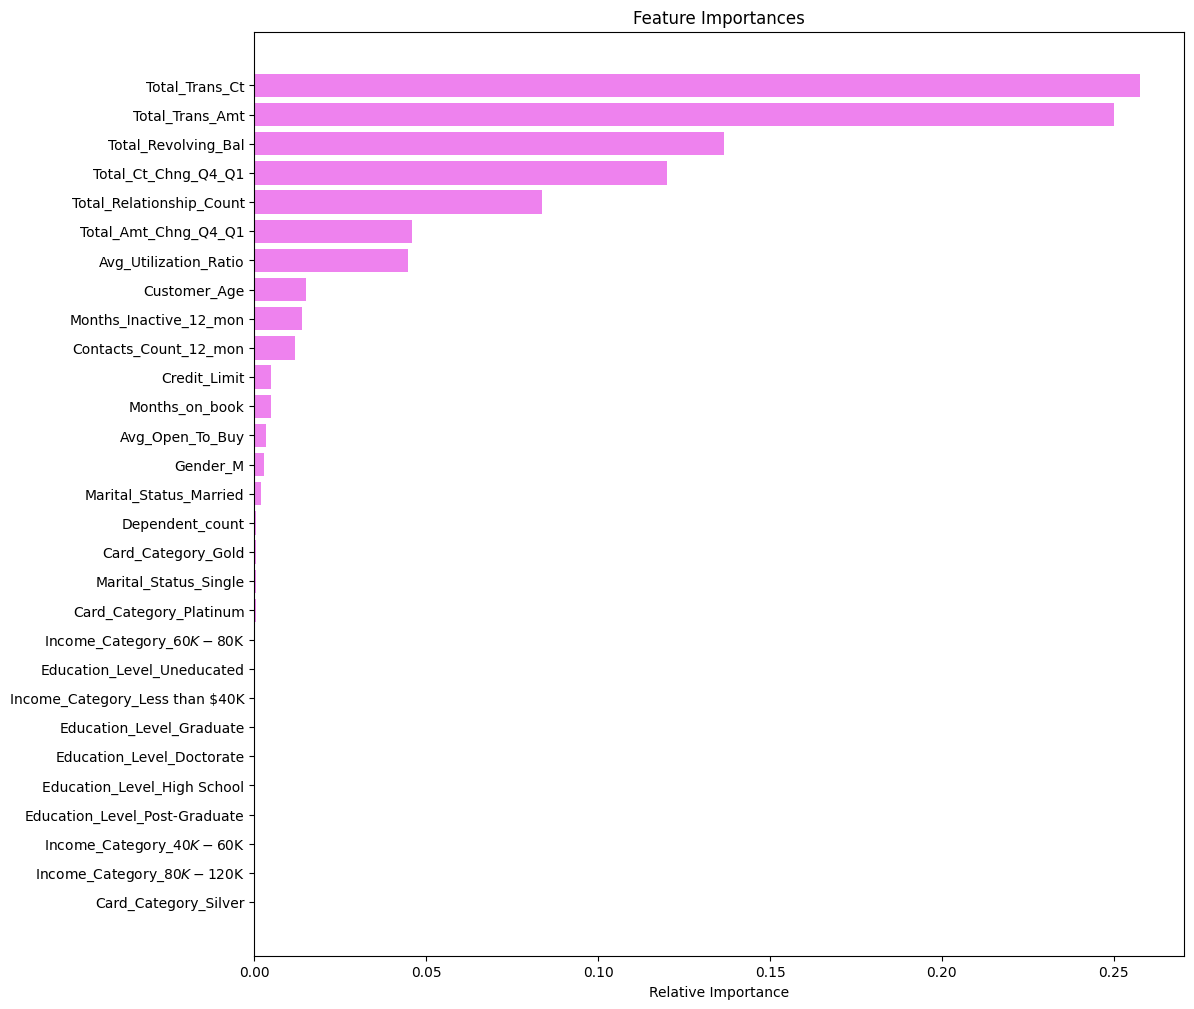

In [ ]:
feature_names = X_train.columns
importances =  gb_tuned_original.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In the selected model for credit card attrition rate prediction, the top five most important features are identified as follows:


> **Total_Trans_Ct: Total Transaction Count (Last 12 months)**

> **Total_Trans_Amt: Total Transaction Amount (Last 12 months)**

> **Total_Revolving_Bal: Total Revolving Balance on the Credit Card**

> **Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)**

> **Total_Relationship_Count: Total no. of products held by the customer**


These features have been determined to significantly influence the model's predictions, indicating that customers' transaction behavior and revolving credit balance play crucial roles in predicting credit card attrition rates.

# Business Insights and Conclusions

Based on the analysis of the top five most important features impacting credit card attrition rate, the following are the business insights and recommendations to reduce attritionto the Thera bank:

**Focus on Transaction Behavior:** The total transaction count and total transaction amount are crucial indicators of customer engagement and activity. Encourage customers to increase their transaction frequency and spend by offering rewards, discounts, or cashback incentives tailored to their spending patterns. Implement personalized marketing campaigns to promote relevant products or services based on transaction history.

**Manage Credit Utilization:** High revolving balances on credit cards indicate potential financial strain or dissatisfaction with credit terms. Provide proactive credit counseling services to help customers manage their balances effectively and offer flexible repayment options or balance transfer facilities to alleviate financial pressure. Educate customers on the importance of maintaining a healthy credit utilization ratio to improve their overall financial well-being.

**Monitor Changes in Behavior:** Changes in transaction behavior, such as fluctuations in transaction counts over different quarters, can signal potential dissatisfaction or life events affecting customers' financial circumstances. Continue implementing predictive analytics models to identify at-risk customers and proactively reach out to offer support, address concerns, or adjust product offerings to better meet their evolving needs.

**Enhance Relationship Management:** Strengthen customer relationships by offering a wide range of financial products and services tailored to individual needs. Cross-sell or upsell complementary products to increase customer engagement and loyalty. Provide personalized assistance and dedicated relationship managers to foster long-term relationships and increase the overall value of customer portfolios.

**Improve Overall Customer Experience:** Enhance the overall customer experience by streamlining processes, reducing friction points, and offering seamless digital banking solutions. Invest in user-friendly mobile apps, intuitive online banking platforms, and responsive customer support channels to ensure convenient access to services and prompt resolution of queries or issues. Solicit feedback from customers through surveys or feedback mechanisms to identify areas for improvement and continuously enhance service delivery.

By implementing these recommendations and focusing on the key drivers of attrition identified in the analysis, Thera bank can effectively reduce attrition rates, increase customer retention, and drive long-term profitability and growth.